In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize']= (15,5)

In [15]:
path = "../dataset/"
filename = "data_4_mes_final.csv"
file = path + str(filename)
df_mes = pd.read_csv(file, delimiter=';')

In [12]:
# Plotando

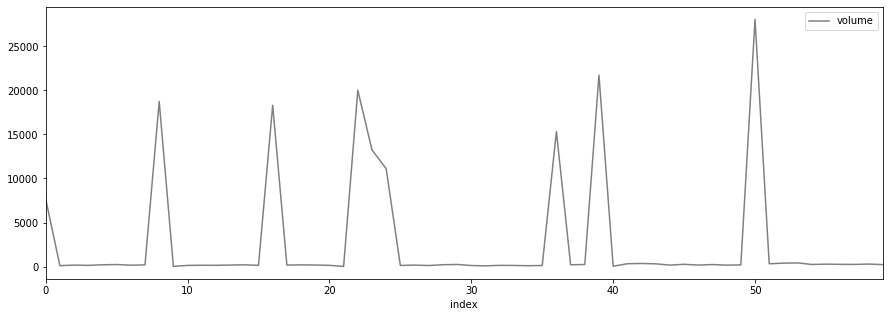

In [18]:
df_mes.plot(kind='line', x='index', y='volume', color='gray')

In [19]:
df_mes.tail()

,index,mes,ano,volume
55,55,8,2017,273.492
56,56,9,2017,252.192
57,57,10,2017,239.412
58,58,11,2017,282.012
59,59,12,2017,220.668


In [20]:
# Dropando ultima linha do df

In [22]:
proxima_fatura_mes = df_mes['volume'].values[-1]
df_mes = df_mes.drop(df_mes.index[-1])

target_df_mes = [[proxima_fatura_mes]]

In [23]:
df_mes.tail()

,index,mes,ano,volume
54,54,7,2017,236.636
55,55,8,2017,273.492
56,56,9,2017,252.192
57,57,10,2017,239.412
58,58,11,2017,282.012


In [24]:
# Test

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import numpy as np

In [46]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                 ('linear', LinearRegression(fit_intercept=False))])

In [47]:
X = pd.DataFrame(df_mes['index'])
y = pd.DataFrame(df_mes['volume'])

In [48]:
model.fit(X,y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [49]:
pred_df_mes = (model.predict([[2]]))

In [50]:
pred_df_mes

array([[1995.67088656]])

In [51]:
y_test = pred_df_mes
y_pred = target_df_mes
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  1775.0028865559884
MSE 3150635.247282091
RMSE 1775.0028865559884


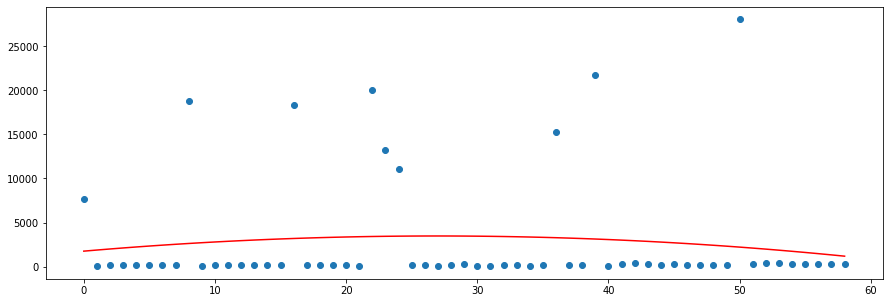

In [52]:
Y_pred = model.predict(X)
plt.scatter(X,y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [53]:
df_mes.corr()

,index,mes,ano,volume
index,1.000000,0.160744,0.979833,-0.025807
mes,0.160744,1.000000,-0.039718,-0.109071
ano,0.979833,-0.039718,1.000000,-0.004044
volume,-0.025807,-0.109071,-0.004044,1.000000


In [55]:
import seaborn as sns

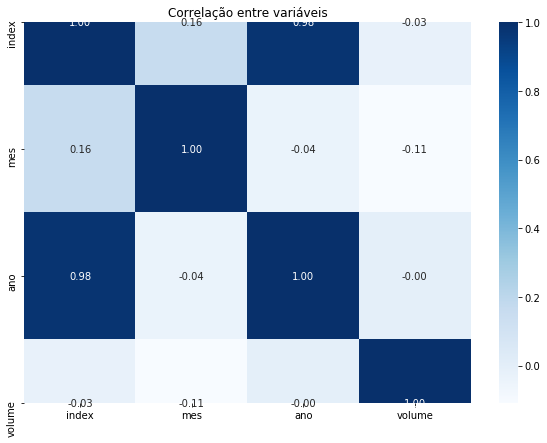

In [56]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_mes.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis')
plt.show()